In [ ]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()
from google.colab import files 
uploaded = files.upload()

Saving metadata.csv to metadata.csv


In [ ]:
#importing the dataset into Colab
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['metadata.csv']))


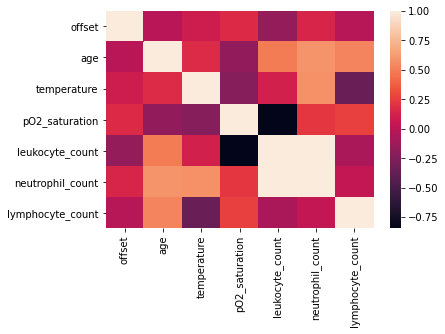

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

In [ ]:
data_extracted_initial=df[['finding','clinical_notes']]
nrow=data_extracted_initial.shape[0]

ncol=data_extracted_initial.shape[1]
print(nrow,ncol)
 
#Check if the rows with null values have to be removed
data_extracted_initial=data_extracted_initial.dropna()
nrow=data_extracted_initial.shape[0]
ncol=data_extracted_initial.shape[1]
print(nrow,ncol)

950 2
768 2


In [ ]:
data_extracted_initial['finding'] = data_extracted_initial['finding'].str.replace("Pneumonia/Viral/COVID-19","COVID-19")
data_extracted_initial['finding'] = data_extracted_initial['finding'].str.replace("Pneumonia/Viral/SARS","SARS")
data_extracted_initial['finding'] = data_extracted_initial['finding'].str.replace("^Pneumonia$","ARDS",regex=True)

virus = ['COVID-19','SARS','ARDS']
data_extracted = data_extracted_initial[data_extracted_initial.finding.str.contains('|'.join(virus))]

nrow=data_extracted.shape[0]
ncol=data_extracted.shape[1]
print(nrow,ncol)
data_extracted.finding.value_counts()

584 2


COVID-19    487
ARDS         81
SARS         16
Name: finding, dtype: int64

In [ ]:
data_extracted['report_length']=data_extracted['clinical_notes'].str.len()
data_extracted['report_length']=data_extracted['report_length'].astype(int)
data_extracted.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,finding,clinical_notes,report_length
0,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",699
1,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917
2,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917
3,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",644
4,COVID-19,diffuse infiltrates in the bilateral lower lungs,48
5,COVID-19,progressive diffuse interstitial opacities and...,115
6,ARDS,Severe ARDS. Person is intubated with an OG in...,53
7,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563
8,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563
9,SARS,SARS in a 74-year-old man who developed sympto...,186


In [ ]:
#Remove punctuation and convert everything to lower case
data_extracted['punctuation']=data_extracted['clinical_notes'].str.lower()
data_extracted['punctuation']=data_extracted['punctuation'].str.replace('[^\w\s]','')
data_extracted.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,finding,clinical_notes,report_length,punctuation
0,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",699,on january 22 2020 a 65yearold man with a hist...
1,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...
2,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...
3,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",644,on january 22 2020 a 65yearold man with a hist...
4,COVID-19,diffuse infiltrates in the bilateral lower lungs,48,diffuse infiltrates in the bilateral lower lungs
5,COVID-19,progressive diffuse interstitial opacities and...,115,progressive diffuse interstitial opacities and...
6,ARDS,Severe ARDS. Person is intubated with an OG in...,53,severe ards person is intubated with an og in ...
7,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...
8,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...
9,SARS,SARS in a 74-year-old man who developed sympto...,186,sars in a 74yearold man who developed symptoms...


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')     #for word_tokenize function
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text): 
  word_list=nltk.word_tokenize(text)
  txt=' '.join([lemmatizer.lemmatize(w,pos='v') for w in word_list])  #noun is not working 
  #s=[lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)] 
  #txt=' '.join(s)
  return txt

data_extracted['lemmatisation'] = data_extracted.punctuation.apply(lemmatize_text)
data_extracted.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,finding,clinical_notes,report_length,punctuation,lemmatisation
0,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",699,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...
1,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...
2,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...
3,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",644,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...
4,COVID-19,diffuse infiltrates in the bilateral lower lungs,48,diffuse infiltrates in the bilateral lower lungs,diffuse infiltrate in the bilateral lower lungs
5,COVID-19,progressive diffuse interstitial opacities and...,115,progressive diffuse interstitial opacities and...,progressive diffuse interstitial opacities and...
6,ARDS,Severe ARDS. Person is intubated with an OG in...,53,severe ards person is intubated with an og in ...,severe ards person be intubate with an og in p...
7,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...,case 2 chest xray obtain on jan 6 2a the brigh...
8,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...,case 2 chest xray obtain on jan 6 2a the brigh...
9,SARS,SARS in a 74-year-old man who developed sympto...,186,sars in a 74yearold man who developed symptoms...,sars in a 74yearold man who develop symptoms 4...


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

def stop_removal(text):
  t=[x for x in text.split() if x not in stop]
  s=' '.join(t)
  return s

data_extracted['stopwords']=data_extracted.lemmatisation.apply(stop_removal)
data_extracted.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,finding,clinical_notes,report_length,punctuation,lemmatisation,stopwords
0,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",699,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...,january 22 2020 65yearold man history hyperten...
1,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...,january 22 2020 65yearold man history hyperten...
2,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",917,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...,january 22 2020 65yearold man history hyperten...
3,COVID-19,"On January 22, 2020, a 65-year-old man with a ...",644,on january 22 2020 a 65yearold man with a hist...,on january 22 2020 a 65yearold man with a hist...,january 22 2020 65yearold man history hyperten...
4,COVID-19,diffuse infiltrates in the bilateral lower lungs,48,diffuse infiltrates in the bilateral lower lungs,diffuse infiltrate in the bilateral lower lungs,diffuse infiltrate bilateral lower lungs
5,COVID-19,progressive diffuse interstitial opacities and...,115,progressive diffuse interstitial opacities and...,progressive diffuse interstitial opacities and...,progressive diffuse interstitial opacities con...
6,ARDS,Severe ARDS. Person is intubated with an OG in...,53,severe ards person is intubated with an og in ...,severe ards person be intubate with an og in p...,severe ards person intubate og place
7,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...,case 2 chest xray obtain on jan 6 2a the brigh...,case 2 chest xray obtain jan 6 2a brightness l...
8,COVID-19,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,563,case 2 chest xray obtained on jan 6 2a the bri...,case 2 chest xray obtain on jan 6 2a the brigh...,case 2 chest xray obtain jan 6 2a brightness l...
9,SARS,SARS in a 74-year-old man who developed sympto...,186,sars in a 74yearold man who developed symptoms...,sars in a 74yearold man who develop symptoms 4...,sars 74yearold man develop symptoms 4 days exp...


In [ ]:
#Construct TFIDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#both unigrams and bigrams are extracted. Change ngram_range=(1,1) only for unigrams
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
data_extracted['number_removed']=data_extracted['stopwords'].str.replace('\d+', '')
tfidf_matrix = tfidf.fit_transform(data_extracted['number_removed'])
print('Shape of tfidf matrix: ',tfidf_matrix.shape)
print('Feature names: ',tfidf.get_feature_names()[400:410])

feature_names = tfidf.get_feature_names()
corpus_index = [n for n in range(1,tfidf_matrix.shape[0]+1)]
values=tfidf_matrix.T.todense()
transpose_values=np.array(values).transpose()
tfidf_matrix_display = pd.DataFrame(transpose_values, index=corpus_index, columns=feature_names)
print(tfidf_matrix_display[['chest', 'patient', 'multiple', 'peripheral','bilateral','lower','lung','image','lob','ct','right','lobe','air','pneumonia','history']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Shape of tfidf matrix:  (584, 12935)
Feature names:  ['allow', 'allow cpap', 'alongside', 'alongside scatter', 'alpha', 'alpha level', 'alpha measure', 'alphab', 'alphab aerosol', 'alter']
        chest   patient  multiple  ...       air  pneumonia   history
1    0.030577  0.000000       0.0  ...  0.000000   0.000000  0.042129
2    0.026471  0.000000       0.0  ...  0.047673   0.000000  0.036472
3    0.026471  0.000000       0.0  ...  0.047673   0.000000  0.036472
4    0.000000  0.000000       0.0  ...  0.000000   0.000000  0.043610
5    0.000000  0.000000       0.0  ...  0.000000   0.000000  0.000000
..        ...       ...       ...  ...       ...        ...       ...
580  0.000000  0.000000       0.0  ...  0.000000   0.000000  0.000000
581  0.000000  0.000000       0.0  ...  0.000000   0.000000  0.000000
582  0.034917  0.000000       0.0  ...  0.000000   0.000000  0.000000
583  0.091897  0.049302       0.0  ...  0.000000   0.035382  0.031654
584  0.091634  0.049161       0.0  ...  0

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data_extracted['finding_encoded']= label_encoder.fit_transform(data_extracted['finding'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataframe=pd.DataFrame()
dataframe['input_variable']=data_extracted['stopwords']
#Change this to use the encoded target variable
dataframe['target']=data_extracted['finding_encoded']
dataframe.head(10)

,input_variable,target
0,january 22 2020 65yearold man history hyperten...,1
1,january 22 2020 65yearold man history hyperten...,1
2,january 22 2020 65yearold man history hyperten...,1
3,january 22 2020 65yearold man history hyperten...,1
4,diffuse infiltrate bilateral lower lungs,1
5,progressive diffuse interstitial opacities con...,1
6,severe ards person intubate og place,0
7,case 2 chest xray obtain jan 6 2a brightness l...,1
8,case 2 chest xray obtain jan 6 2a brightness l...,1
9,sars 74yearold man develop symptoms 4 days exp...,2


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

373 train examples
94 validation examples
117 test examples


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each report.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
oov_tok='<OOV>'

tokenizer = Tokenizer(num_words = MAX_NB_WORDS, oov_token=oov_tok)
tokenizer.fit_on_texts(train['input_variable'])
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'bilateral': 7,
 'chest': 2,
 'consolidation': 9,
 'fever': 4,
 'leave': 8,
 'lower': 10,
 'patient': 3,
 'right': 5,
 'show': 6}

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train['input_variable'])
print(train_sequences[1])

[676, 107, 3, 16, 4, 265, 79, 11, 312, 349, 13, 267, 142, 2, 158, 677, 32, 446, 389, 86, 234, 59, 60, 248, 447, 678, 164, 15, 66, 195, 164, 679, 164, 350, 33, 96, 89, 159, 680, 165, 15, 66, 291, 165, 3, 681, 98, 62, 682, 389, 16, 4, 388, 79, 11, 249, 574, 3, 683, 684, 351, 170, 575, 685, 889, 222, 890, 576, 2, 22, 61, 212, 7, 39, 41, 21, 292, 10, 27, 97, 112, 268, 108, 686, 505, 577, 269, 63, 687, 151, 87, 352, 688, 40]


In [ ]:
#sequences to be in the same size, that’s why we use padding
import tensorflow.keras as keras
trunc_type = 'post'
padding_type = 'post'

train_padded = keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))
print(train_padded[10])

83
250
94
250
52
250
[ 905   43   19  270   16   11    4  251   17   29   25  129   54   92
   55  906  254  907  908  275   25  458  200  395  225  174  584   62
  693    2  158  697  909  213  160    6    5  152   31 1635  272 1636
  125  128 1127   74  255   39   88   64   10   31    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 

In [ ]:
#Now we do the same for validation sequences
validation_sequences = tokenizer.texts_to_sequences(val['input_variable'])
validation_padded = keras.preprocessing.sequence.pad_sequences(validation_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

#Test sequences
test_sequences = tokenizer.texts_to_sequences(test['input_variable'])
test_padded = keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding=padding_type, truncating=trunc_type)

print(len(test_sequences))
print(test_padded.shape)

94
(94, 250)
117
(117, 250)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train['input_variable'][0])

In [ ]:
from keras.layers.core import Dense, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from keras.layers.embeddings import Embedding
from keras.layers.pooling import GlobalMaxPooling1D
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from tensorflow.keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(EMBEDDING_DIM)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(EMBEDDING_DIM, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         5000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 5,181,506
Trainable params: 5,181,506
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, train['target'], epochs=num_epochs, validation_data=(validation_padded, val['target']), verbose=2)

Epoch 1/10
12/12 - 10s - loss: 1.2798 - accuracy: 0.7560 - val_loss: 0.8055 - val_accuracy: 0.8191
Epoch 2/10
12/12 - 5s - loss: 0.5740 - accuracy: 0.8338 - val_loss: 0.6149 - val_accuracy: 0.8191
Epoch 3/10
12/12 - 5s - loss: 0.5220 - accuracy: 0.8338 - val_loss: 0.5609 - val_accuracy: 0.8191
Epoch 4/10
12/12 - 5s - loss: 0.4397 - accuracy: 0.8338 - val_loss: 0.4684 - val_accuracy: 0.8191
Epoch 5/10
12/12 - 5s - loss: 0.2599 - accuracy: 0.9223 - val_loss: 0.4139 - val_accuracy: 0.8936
Epoch 6/10
12/12 - 5s - loss: 0.1506 - accuracy: 0.9517 - val_loss: 0.3641 - val_accuracy: 0.8936
Epoch 7/10
12/12 - 5s - loss: 0.0762 - accuracy: 0.9705 - val_loss: 0.3703 - val_accuracy: 0.9043
Epoch 8/10
12/12 - 5s - loss: 0.0276 - accuracy: 0.9973 - val_loss: 0.3641 - val_accuracy: 0.9468
Epoch 9/10
12/12 - 5s - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.3907 - val_accuracy: 0.9468
Epoch 10/10
12/12 - 5s - loss: 0.0247 - accuracy: 0.9973 - val_loss: 0.3821 - val_accuracy: 0.9362


In [ ]:
y_test=test['target'].values
score = model.evaluate(test_padded, y_test, verbose = 0) 
loss = score[0]
accuracy = score[1]
print('Test loss:', loss) rrr
print('Test accuracy:', accuracy)

Test loss: 0.062319315969944
Test accuracy: 0.9743589758872986


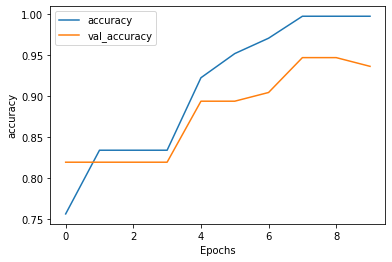

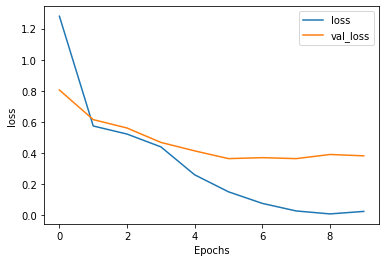

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")